In [2]:
import pandas as pd #import pandas
import numpy as np #import numpy
import matplotlib.pyplot as plt #import mathplot


In [3]:
data = {"Country":["B", "C","D","E","F","G","H"], "Output":[80,150,135,165,95,130,110], "Labour":[60,100,100,120,70,90,80],"Capital":[50,100,80,100,60,80,70]}
dataset = pd.DataFrame(data, columns = ["Country" , "Output" , "Labour", "Capital" ] ) #creat data frames
dataset #save it as dataset

,Country,Output,Labour,Capital
0,B,80,60,50
1,C,150,100,100
2,D,135,100,80
3,E,165,120,100
4,F,95,70,60
5,G,130,90,80
6,H,110,80,70


In [4]:
mean_dataset = dataset.mean() #calculate mean of data
var_dataset = dataset.var() #calculate var of data
median_dataset=dataset.median() #calculate median of data
std_dataset= dataset.std() #calculate std of data
stat_table = pd.concat([mean_dataset,var_dataset,median_dataset,std_dataset], axis =1, keys =['mean','var','median','std']) #create stat table
stat_table 

,mean,var,median,std
Output,123.571429,914.285714,130.0,30.237158
Labour,88.571429,414.285714,90.0,20.354010
Capital,77.142857,357.142857,80.0,18.898224


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002198F333E48>]],
      dtype=object)

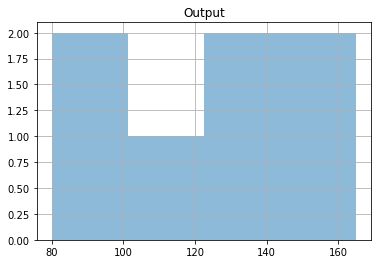

In [5]:
dataset.hist(column="Output",alpha =0.5, bins="auto") #construct histogram of Output data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002198E79FE80>]],
      dtype=object)

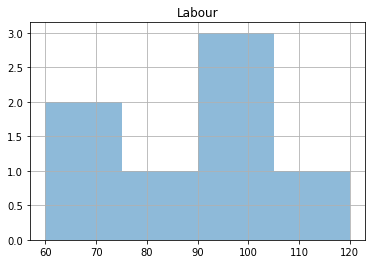

In [6]:
dataset.hist(column="Labour", bins ="auto",alpha =0.5) #construct histogram of Labour data


In [7]:
output_log= np.log(dataset["Output"]) #calculate log value of Output
labour_log= np.log(dataset["Labour"]) #calculate log value of Labour
capital_log =np.log(dataset["Capital"])#calculate log value of Capital
dataset_log =pd.concat([dataset["Country"],output_log,labour_log,capital_log], axis =1) #join and save as new table
dataset_log

,Country,Output,Labour,Capital
0,B,4.382027,4.094345,3.912023
1,C,5.010635,4.605170,4.605170
2,D,4.905275,4.605170,4.382027
3,E,5.105945,4.787492,4.605170
4,F,4.553877,4.248495,4.094345
5,G,4.867534,4.499810,4.382027
6,H,4.700480,4.382027,4.248495


In [8]:
import sklearn.linear_model as LinearRegression #import package to fit linear regression
import statsmodels.api as sm #import package statsmodels to have more detail about fitting
import statsmodels.formula.api as smf

In [9]:
from sklearn.linear_model import LinearRegression 
est = LinearRegression(fit_intercept =True) #fit multiple linear regression
x_pg = dataset_log[["Capital","Labour"]] #predictors are Capital and Labour
y_pg =dataset_log["Output"] #reponse variable
est.fit(x_pg,y_pg) #fitting multiple linear regression 
print("coefficients:", est.coef_) 
print( "Intercept:", est.intercept_)

coefficients: [0.50874094 0.54842747]
Intercept: 0.14623321175616777


In [11]:
value_A = np.exp(est.intercept_) #calculate the value of A 
value_A

1.1574660912771215

The value of A is 1.1574660912771215
The estimated alpha is 0.5484
The estimated beta is 0.5087
The sum of alpha and beta is larger than 1, which means not Constant Return but increasing returns to scale',the Q output  increases by more than the proportional change in L and K inputs. 

In [9]:
results = smf.ols('Output~ Capital +Labour', data= dataset_log).fit() #fitting by statsmodel 
results.summary()

C:\Users\da\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Output   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Wed, 15 May 2019   Prob (F-statistic):           4.34e-06
Time:                        23:35:20   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1462      0.114      1.282      0.269      -0.170       0.463
Capital        0.5087      0.083      6.150      0.004       0.279       0.738
Labour         0.5484      0.090      6.127      0.004       0.300       0.797
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.801
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.261
Skew:                           1.352   Prob(JB):                        0.323
Kurtosis:                       3.665   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

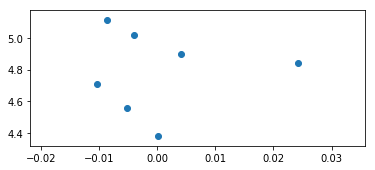

In [10]:
from sklearn import metrics 
y_hat = est.predict(x_pg) #use predict to calculate fitted values 
residual =y_pg - y_hat #obtain residuals from actual and fitted values 
residual
fig, ax =plt.subplots(figsize =(6,2.5)) #plot the residuals 
_ = ax.scatter(residual, y_hat)

Adjusted R-square in model is 0.997